# 4. Evaluation Metrice for Classification
In the previous session we trainted a model for predicting churn. How do we know if it's good? 

## 4.1 Evaluation metrics: session overview
* Dataset: https//www.kaggle.com/blastchar/telco-customer-churn
* https:://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Metric - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
data_url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [6]:
import os
filename = 'data-week-4.csv'
if not os.path.exists(filename):
    os.system(f'wget {data_url} -O {filename}')
    print(f"Le fichier {filename} a été téléchargé avec succès.")
else:
    # Si le fichier existe déjà, imprimez un message
    print(f"Le fichier {filename} existe déjà.")

--2024-01-16 09:46:17--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: 'data-week-4.csv'

     0K .......... .......... .......... .......... ..........  5% 1.06M 1s
    50K .......... .......... .......... .......... .......... 10% 1.68M 1s
   100K .......... .......... .......... .......... .......... 15% 1.32M 1s
   150K .......... .......... .......... .......... .......... 20% 2.12M 1s
   200K .......... .......... .......... .......... .......... 26% 2.82M 0s
   250K .......... .......... .......... .......... .......... 31% 2.48M 0s
   300K .......... .......... .......... ....

Le fichier data-week-4.csv a été téléchargé avec succès.


.... .......... .......... .......... 99% 2.38M 0s
   950K ....                                                  100% 8.55T=0.4s

2024-01-16 09:46:17 (2.24 MB/s) - 'data-week-4.csv' saved [977501/977501]



In [12]:
df = pd.read_csv(filename)
df.columns = df.columns.str.lower().str.replace(' ', '_') # edit columns names
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_') # edit content of column

In [13]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.churn = (df.churn == 'yes').astype(int)

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

df_train.drop('churn', axis=1, inplace=True)
df_val.drop('churn', axis=1, inplace=True)
df_test.drop('churn', axis=1, inplace=True)

In [18]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [19]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
model = LogisticRegression()
model.fit(X_train, y_train)

/home/wm18vw/miniconda3/envs/machineLearning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:,1] # soft prediction
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.7984386089425124

## 4.2 Accuracy and dummy model

In [22]:
len(y_val)

1409

In [24]:
(y_val == churn_decision).sum()

1125

In [25]:
1125/1409

0.7984386089425124

In [33]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_val, y_pred >= 0.5)

0.7984386089425124

Accuracy $= \frac{1125}{1409} \approx 80\%$

In [36]:
thresholds = np.linspace(0,1,21)
scores = []

for t in thresholds:
    #churn_decision = (y_pred >= t)
    #score = (y_val == churn_decision).mean()
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.512
0.10 0.597
0.15 0.668
0.20 0.709
0.25 0.735
0.30 0.755
0.35 0.769
0.40 0.783
0.45 0.797
0.50 0.798
0.55 0.802
0.60 0.796
0.65 0.787
0.70 0.764
0.75 0.745
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


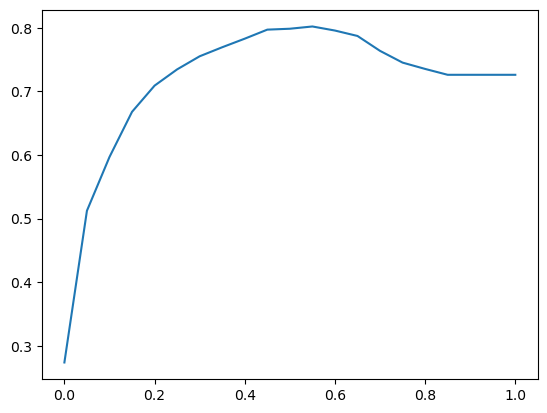

In [37]:
plt.plot(thresholds, scores)

In [38]:
from collections import Counter

In [39]:
Counter(y_pred >=1.0)

Counter({False: 1409})

In [40]:
1 - y_val.mean()

0.7260468417317246

## 4.3 Confusion table
* Different types of errors correct decisions
* Arranging therm in a table

In [41]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [42]:
actual_positive

array([False, False, False, ..., False,  True,  True])

In [43]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [45]:
predict_positive[:5]

array([False, False, False,  True, False])

In [46]:
actual_positive[:5]

array([False, False, False,  True, False])

In [48]:
tp = (predict_positive & actual_positive).sum() #true positive
tn = (predict_negative & actual_negative).sum() #true positive

In [50]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [51]:
fp, fn

(109, 175)

In [52]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]])
confusion_matrix

array([[914, 109],
       [175, 211]])

In [53]:
(confusion_matrix / confusion_matrix.sum()).round(2) # % de l'accuracy

array([[0.65, 0.08],
       [0.12, 0.15]])

Accuracy $= 0.65 + 0.15 = 0.8 \rightarrow 80\%$

## 4.4 Precision and Recall

In [54]:
(tp + tn) / (tp + tn + fp + fn)

0.7984386089425124

In [56]:
p = tp / (tp +fp)
p

0.659375

Precision $= 67\%$
Erreur: $33\%$

Recall = Fraction of correctly identified positive examples

In [58]:
r = tp / (tp + fn)
r

0.5466321243523317

## 4.5 ROC Curves
ROC stands for Receiver Operating Characteristics
This is a way of describing the performance of a binary classification model
### TPR and FPR

In [60]:
# True Positive Ratio. It's the same as Recall
tpr = tp / (tp + fn)
tpr

0.5466321243523317

In [61]:
# False Positive Ratio
fpr = fp / (fp + tn)
fpr

0.10654936461388075

In [64]:
scores = []

thresholds = np.linspace(0,1,101)
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum() #true positive
    tn = (predict_negative & actual_negative).sum() #true positive
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))
    

In [66]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [68]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,548,20,475
20,0.2,334,358,52,665
30,0.3,283,242,103,781
40,0.4,250,170,136,853
50,0.5,211,109,175,914
60,0.6,153,55,233,968
70,0.7,77,24,309,999
80,0.8,14,1,372,1022
90,0.9,0,0,386,1023


In [70]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,548,20,475,0.948187,0.535679
20,0.2,334,358,52,665,0.865285,0.349951
30,0.3,283,242,103,781,0.733161,0.236559
40,0.4,250,170,136,853,0.647668,0.166178
50,0.5,211,109,175,914,0.546632,0.106549
60,0.6,153,55,233,968,0.396373,0.053763
70,0.7,77,24,309,999,0.199482,0.023460
80,0.8,14,1,372,1022,0.036269,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


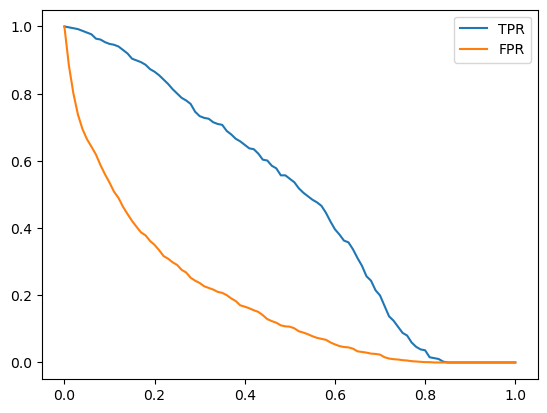

In [72]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

### Random model

In [75]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [76]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [77]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0,1,101)
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum() #true positive
        tn = (predict_negative & actual_negative).sum() #true positive
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [78]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [79]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


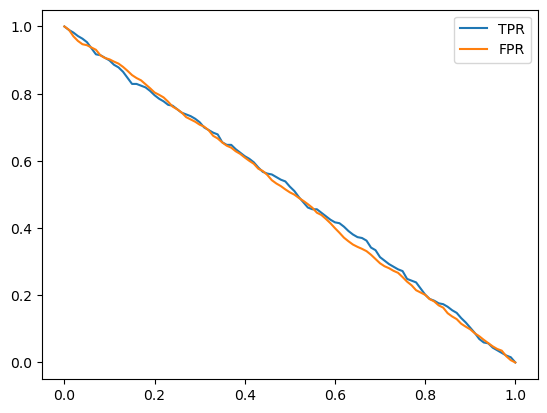

In [80]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

### Ideal model

In [82]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

### Putting everything together

# 4.5 @ 18:57